In [81]:
import qube
from qube.portfolio.signals_analysis import signals_statistics
%alphalab dark
import seaborn as sns

# Load historical data

In [ ]:
data = load_data('BINANCEF:BTCUSDT', timeframe='15Min', dbtype='csv', path='./')

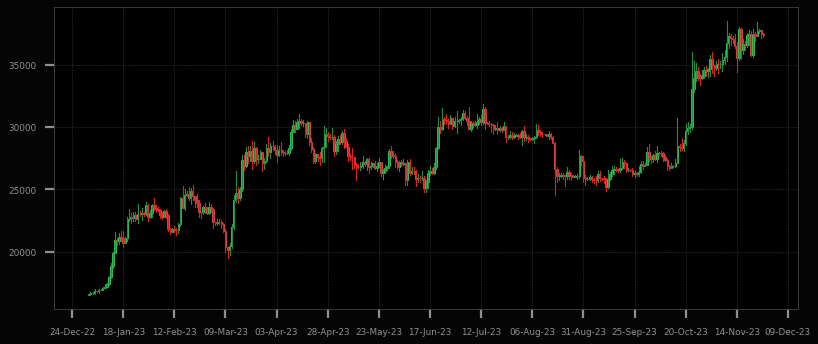

In [70]:
ohlc_plot(data.ohlc('1d')['2023':]);

# Strategy

In [27]:
from qube.examples.strategies.test_strategies import TestTrader

In [28]:
variants = variate(TestTrader, 5000, 2.5, 3, '4H', fast_period=[10, 20, 30, 40], slow_period=[100, 120]),

In [30]:
r1 = simulation(variants, data.ohlcs('4H'), 'binance_um_vip0_usdt')

backtest:   0%|          | 0.00/800 [00:00<?, ? signals/s]

 0: /0/TT_(fp=10,sp=100)  : Sharpe: 0.21 | Sortino: 0.42 | CAGR: 2.21 | DD: $1775.58 (35.51%) | Gain: $483.80 | Execs: 100 | Comm: 291.05[inc][OK]
 1: /0/TT_(fp=10,sp=120)  : Sharpe: -0.15 | Sortino: -0.28 | CAGR: -3.90 | DD: $1970.14 (37.70%) | Gain: $-772.90 | Execs: 96 | Comm: 260.83[inc][OK]
 2: /0/TT_(fp=20,sp=100)  : Sharpe: 0.90 | Sortino: 2.18 | CAGR: 14.25 | DD: $1308.57 (23.84%) | Gain: $3777.30 | Execs: 100 | Comm: 420.85[inc][OK]
 3: /0/TT_(fp=20,sp=120)  : Sharpe: -0.06 | Sortino: -0.13 | CAGR: -3.02 | DD: $2289.41 (43.70%) | Gain: $-606.97 | Execs: 92 | Comm: 347.73[inc][OK]
 4: /0/TT_(fp=30,sp=100)  : Sharpe: -0.48 | Sortino: -0.91 | CAGR: -7.62 | DD: $1578.62 (30.61%) | Gain: $-1422.22 | Execs: 90 | Comm: 288.03[inc][OK]
 5: /0/TT_(fp=30,sp=120)  : Sharpe: 0.57 | Sortino: 1.30 | CAGR: 7.54 | DD: $995.60 (15.16%) | Gain: $1798.65 | Execs: 72 | Comm: 352.75[inc][OK]
 6: /0/TT_(fp=40,sp=100)  : Sharpe: -0.02 | Sortino: -0.04 | CAGR: -1.37 | DD: $2420.69 (41.40%) | Gain: $-

,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,"/0/TT_(fp=10,sp=100)",0.208107,0.417326,2.210315,1775.583933,35.511679,483.804688,100,291.0460
1,"/0/TT_(fp=10,sp=120)",-0.153941,-0.277282,-3.896829,1970.138204,37.701107,-772.897508,96,260.8336
2,"/0/TT_(fp=20,sp=100)",0.896860,2.178426,14.248017,1308.573597,23.843163,3777.297530,100,420.8482
3,"/0/TT_(fp=20,sp=120)",-0.064957,-0.127424,-3.016954,2289.413470,43.701260,-606.967629,92,347.7298
4,"/0/TT_(fp=30,sp=100)",-0.480914,-0.912883,-7.616718,1578.620708,30.614769,-1422.218210,90,288.0300
5,"/0/TT_(fp=30,sp=120)",0.574234,1.296382,7.544704,995.597415,15.163795,1798.652318,72,352.7506
6,"/0/TT_(fp=40,sp=100)",-0.020774,-0.044500,-1.369333,2420.693510,41.402546,-282.926759,88,241.4466
7,"/0/TT_(fp=40,sp=120)",-0.367910,-0.742732,-5.855073,2244.188323,39.619596,-1125.006586,70,210.9170


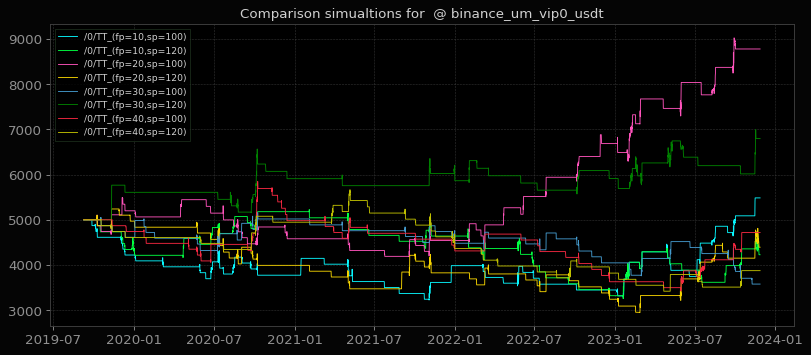

In [31]:
r1.report(5000)

In [114]:
print(f"Winner: {variants[0]['TT_(fp=20,sp=100)']}")

Winner: TestTrader(5000,2.5,3,4H,20,100)


In [33]:
r2 = simulation(
    {
        'Run Best': variants[0]['TT_(fp=20,sp=100)'] 
    }, 
    data.ohlcs('4H'), 'binance_um_vip0_usdt' 
)

backtest:   0%|          | 0.00/100 [00:00<?, ? signals/s]

 0: /Run Best  : Sharpe: 0.90 | Sortino: 2.18 | CAGR: 14.25 | DD: $1308.57 (23.84%) | Gain: $3777.30 | Execs: 100 | Comm: 420.85[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Run Best,0.89686,2.178426,14.248017,1308.573597,23.843163,3777.29753,100,420.8482


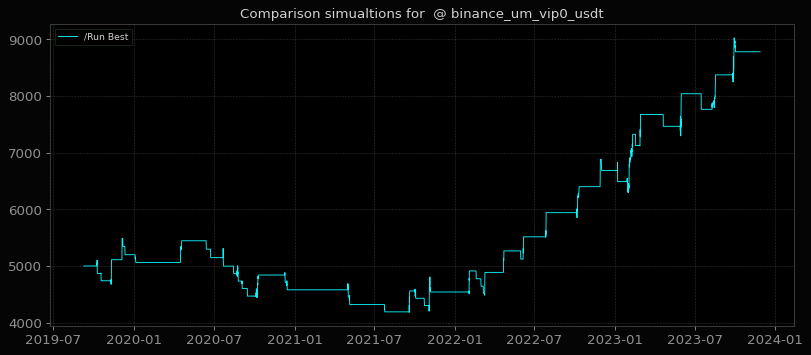

In [34]:
r2.report(5000)

In [35]:
r2.results[0].trackers_stat

{'BTCUSDT': {'triggers': 50,
  'fired': 50,
  'takes': 19,
  'stops': 31,
  'average_time_to_take': datetime.timedelta(days=2, seconds=23646, microseconds=315789),
  'average_time_to_stop': datetime.timedelta(seconds=55556, microseconds=129032)}}

## Signals statistics

In [84]:
stats = signals_statistics(r2.results[0], 'BTCUSDT', data.ohlc('1H'))

/usr/local/envs/p310a/lib/python3.10/site-packages/qube/portfolio/signals_analysis.py:87: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  tx = prices.index[prices.index.get_loc(tx, method='bfill')]


In [111]:
stats.head(10)

,direction,entry_time,quantity,entry_price,exit_time,exit_price,commissions,hold_time,signed_change,pnl,...,er_x,ampl_max,ampl_max_pct,ampl_time_max,er_max,ampl_min,ampl_min_pct,ampl_time_min,er_min,index
2019-10-08 10:24:00,-1.0,2019-10-08 10:24:00,-11410.0,8195.00,2019-10-09 14:24:00,8284.78,6.8460,1 days 04:00:00,89.78,-125.001806,...,-0.351672,91.12,0.011119,0 days 09:36:00,0.309577,254.00,0.030995,1 days 03:36:00,-0.351672,0
2019-10-17 10:24:00,1.0,2019-10-17 10:24:00,6294.0,8060.33,2019-10-18 06:24:00,7900.24,3.7764,0 days 20:00:00,-160.09,-125.008090,...,-0.360413,64.30,0.007977,0 days 05:36:00,0.201511,239.32,0.029691,0 days 18:36:00,-0.391516,1
2019-11-09 22:24:00,1.0,2019-11-09 22:24:00,10967.0,8827.62,2019-11-10 18:24:00,9129.48,4.3868,0 days 20:00:00,301.86,375.015986,...,0.423106,359.38,0.040711,0 days 17:36:00,0.410480,67.62,0.007660,0 days 04:36:00,-0.612491,2
2019-12-04 22:24:00,-1.0,2019-12-04 22:24:00,-15262.0,7435.58,2019-12-04 22:24:00,7248.32,6.1048,0 days 00:00:00,-187.26,384.363038,...,-0.000000,265.49,0.035705,0 days 00:36:00,-0.000000,-179.93,-0.024199,0 days 00:36:00,-0.000000,3
2019-12-06 02:24:00,-1.0,2019-12-06 02:24:00,-8972.0,7332.44,2019-12-06 18:24:00,7445.00,5.3832,0 days 16:00:00,112.56,-137.728822,...,-0.177567,36.71,0.005007,0 days 08:36:00,0.169395,270.00,0.036823,0 days 14:36:00,-0.286752,4
2019-12-11 10:24:00,1.0,2019-12-11 10:24:00,20621.0,7224.82,2019-12-11 14:24:00,7177.77,12.3726,0 days 04:00:00,-47.05,-134.289581,...,0.097704,35.18,0.004869,0 days 01:36:00,1.000000,9.82,0.001359,0 days 00:36:00,0.000000,5
2020-01-03 21:36:00,-1.0,2020-01-03 21:36:00,-7277.0,7276.35,2020-01-05 02:24:00,7407.28,4.3662,1 days 04:48:00,130.93,-130.941696,...,-0.270652,20.51,0.002819,0 days 00:24:00,-0.000000,211.65,0.029087,1 days 03:24:00,-0.306830,6
2020-04-16 06:24:00,1.0,2020-04-16 06:24:00,4303.0,6663.00,2020-04-18 14:24:00,7256.01,1.7212,2 days 08:00:00,593.01,382.968937,...,0.207075,601.62,0.090293,2 days 07:36:00,0.207075,-15.47,-0.002322,0 days 00:36:00,0.000000,7
2020-06-13 17:36:00,1.0,2020-06-13 17:36:00,17544.0,9460.00,2020-06-13 18:24:00,9386.00,10.5264,0 days 00:48:00,-74.00,-137.236364,...,0.000000,-12.20,-0.001290,0 days 00:24:00,0.000000,34.83,0.003682,0 days 00:24:00,0.000000,8
2020-06-23 10:24:00,-1.0,2020-06-23 10:24:00,-26830.0,9625.00,2020-06-23 14:24:00,9673.00,16.0980,0 days 04:00:00,48.00,-133.801558,...,-0.696129,32.38,0.003364,0 days 00:36:00,-0.000000,53.25,0.005532,0 days 03:36:00,-0.696129,9


Distribution of PnL vs distribution of maximal possible profits / losses

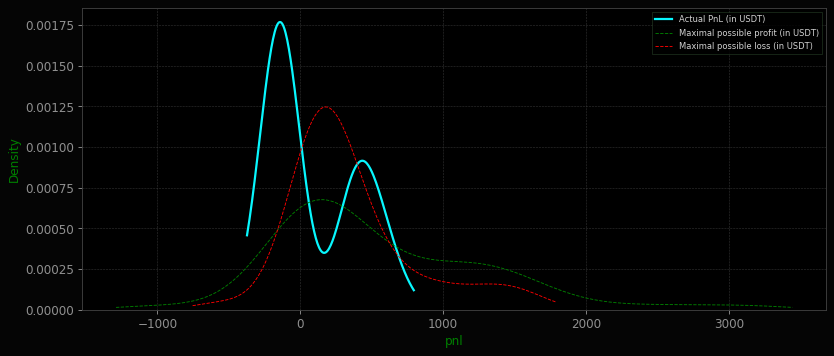

In [112]:
sns.kdeplot(stats.pnl, lw=2, cut=1, label='Actual PnL (in USDT)');
sns.kdeplot(stats.ampl_max, ls='--', c='g', cut=1, label='Maximal possible profit (in USDT)')
sns.kdeplot(stats.ampl_min, ls='--', c='r', cut=1, label='Maximal possible loss (in USDT)');
plt.legend();

In [113]:
pfactor = sum(stats[stats.pnl > 0].pnl) / sum(abs(stats[stats.pnl < 0].pnl))
print(f'Profit Factor: {pfactor:.3f}')

Profit Factor: 1.948


## Tearsheet stats


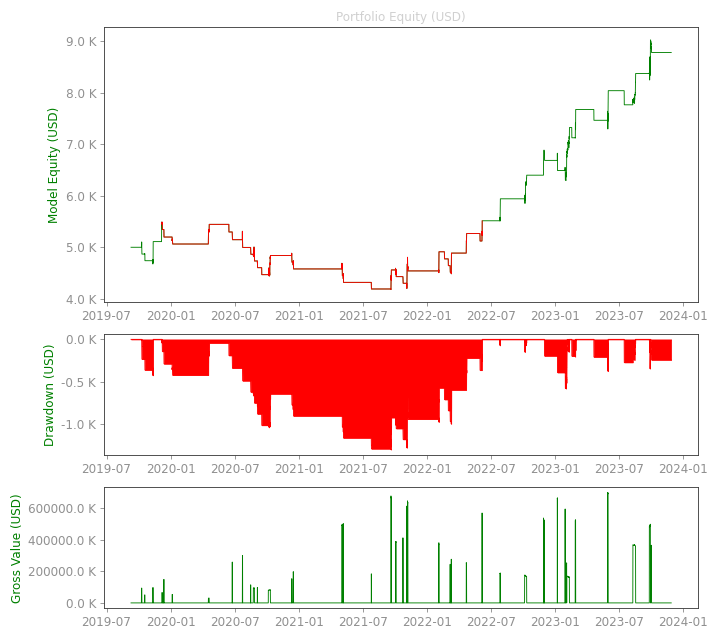

<Figure size 720x640 with 0 Axes>

In [123]:
tearsheet(r2.results[0], 5000)